In [3]:
import matplotlib.pyplot as plt
from torchsummary import summary
from main import get_data_loader, train_validate
from utils import get_train_parameters, get_schedular, classes_dict, suggest_lr, plot_loss_accuracy, get_misclassified, show_misclassified, show_gradcam_results

In [11]:
num_epochs = 20
batch_size = 512
train_loader, test_loader = get_data_loader(batch_size)
model, device, optimizer, criterion = get_train_parameters()
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

  0%|          | 0/200 [00:00<?, ?it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 5.22E-02


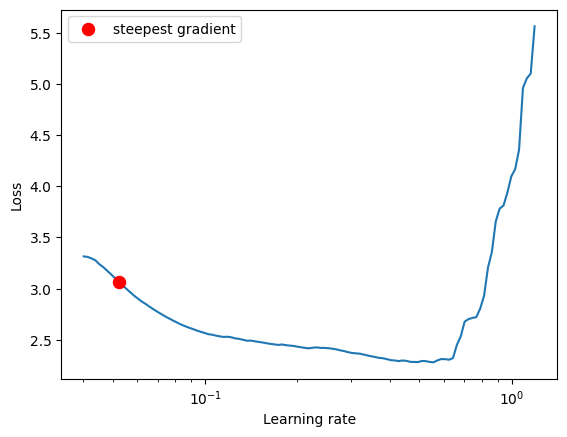

In [19]:
suggest_lr(train_loader, model, optimizer, criterian, device)

In [21]:
schedular = get_schedular(train_loader, num_epochs, max_lr = 5.22E-02)
train_validate(model, device, train_loader, optimizer, criterion, num_epochs, scheduler, test_loader)

EPOCH: 0


LR = 0.010878736196319018 Loss=1.2976105213165283 Batch_id=97 Accuracy=41.60: 100%|██████████| 98/98 [00:41<00:00,  2.36it/s]



Test set: Average loss: 0.0038, Accuracy: 3944/10000 (39.44%)

EPOCH: 1


LR = 0.02123547239263804 Loss=1.2220138311386108 Batch_id=97 Accuracy=56.06: 100%|██████████| 98/98 [00:41<00:00,  2.36it/s]



Test set: Average loss: 0.0028, Accuracy: 4994/10000 (49.94%)

EPOCH: 2


LR = 0.03159220858895705 Loss=0.9389166831970215 Batch_id=97 Accuracy=62.17: 100%|██████████| 98/98 [00:41<00:00,  2.37it/s]



Test set: Average loss: 0.0025, Accuracy: 5603/10000 (56.03%)

EPOCH: 3


LR = 0.041948944785276075 Loss=0.8602550029754639 Batch_id=97 Accuracy=66.20: 100%|██████████| 98/98 [00:41<00:00,  2.37it/s]



Test set: Average loss: 0.0044, Accuracy: 4049/10000 (40.49%)

EPOCH: 4


LR = 0.052164493346938776 Loss=0.9611035585403442 Batch_id=97 Accuracy=67.03: 100%|██████████| 98/98 [00:41<00:00,  2.36it/s]



Test set: Average loss: 0.0033, Accuracy: 4954/10000 (49.54%)

EPOCH: 5


LR = 0.048684841346938776 Loss=0.8682266473770142 Batch_id=97 Accuracy=68.37: 100%|██████████| 98/98 [00:41<00:00,  2.38it/s]



Test set: Average loss: 0.0046, Accuracy: 4484/10000 (44.84%)

EPOCH: 6


LR = 0.045205189346938776 Loss=0.7835556864738464 Batch_id=97 Accuracy=70.51: 100%|██████████| 98/98 [00:41<00:00,  2.37it/s]



Test set: Average loss: 0.0023, Accuracy: 6440/10000 (64.40%)

EPOCH: 7


LR = 0.041725537346938776 Loss=0.6757283806800842 Batch_id=97 Accuracy=71.64: 100%|██████████| 98/98 [00:40<00:00,  2.40it/s]



Test set: Average loss: 0.0034, Accuracy: 5506/10000 (55.06%)

EPOCH: 8


LR = 0.03824588534693878 Loss=0.7836631536483765 Batch_id=97 Accuracy=72.85: 100%|██████████| 98/98 [00:40<00:00,  2.39it/s]



Test set: Average loss: 0.0021, Accuracy: 6469/10000 (64.69%)

EPOCH: 9


LR = 0.03476623334693878 Loss=0.7207595109939575 Batch_id=97 Accuracy=73.46: 100%|██████████| 98/98 [00:40<00:00,  2.42it/s]



Test set: Average loss: 0.0020, Accuracy: 6485/10000 (64.85%)

EPOCH: 10


LR = 0.03128658134693878 Loss=0.7595155239105225 Batch_id=97 Accuracy=74.41: 100%|██████████| 98/98 [00:41<00:00,  2.38it/s]



Test set: Average loss: 0.0024, Accuracy: 6194/10000 (61.94%)

EPOCH: 11


LR = 0.027806929346938777 Loss=0.645033597946167 Batch_id=97 Accuracy=75.44: 100%|██████████| 98/98 [00:40<00:00,  2.41it/s]



Test set: Average loss: 0.0016, Accuracy: 7092/10000 (70.92%)

EPOCH: 12


LR = 0.024327277346938774 Loss=0.6310495734214783 Batch_id=97 Accuracy=77.25: 100%|██████████| 98/98 [00:40<00:00,  2.41it/s]



Test set: Average loss: 0.0017, Accuracy: 7298/10000 (72.98%)

EPOCH: 13


LR = 0.020847625346938778 Loss=0.595320463180542 Batch_id=97 Accuracy=78.05: 100%|██████████| 98/98 [00:40<00:00,  2.40it/s]



Test set: Average loss: 0.0014, Accuracy: 7739/10000 (77.39%)

EPOCH: 14


LR = 0.017367973346938778 Loss=0.6053334474563599 Batch_id=97 Accuracy=79.09: 100%|██████████| 98/98 [00:40<00:00,  2.42it/s]



Test set: Average loss: 0.0013, Accuracy: 7778/10000 (77.78%)

EPOCH: 15


LR = 0.013888321346938778 Loss=0.45999273657798767 Batch_id=97 Accuracy=80.50: 100%|██████████| 98/98 [00:40<00:00,  2.42it/s]



Test set: Average loss: 0.0020, Accuracy: 7063/10000 (70.63%)

EPOCH: 16


LR = 0.010408669346938779 Loss=0.4597232937812805 Batch_id=97 Accuracy=82.05: 100%|██████████| 98/98 [00:40<00:00,  2.42it/s]



Test set: Average loss: 0.0012, Accuracy: 8019/10000 (80.19%)

EPOCH: 17


LR = 0.006929017346938779 Loss=0.5074698328971863 Batch_id=97 Accuracy=83.94: 100%|██████████| 98/98 [00:40<00:00,  2.41it/s]



Test set: Average loss: 0.0009, Accuracy: 8386/10000 (83.86%)

EPOCH: 18


LR = 0.003449365346938779 Loss=0.3362031579017639 Batch_id=97 Accuracy=86.32: 100%|██████████| 98/98 [00:40<00:00,  2.43it/s]



Test set: Average loss: 0.0008, Accuracy: 8597/10000 (85.97%)

EPOCH: 19


LR = -3.028665306122058e-05 Loss=0.3652171492576599 Batch_id=97 Accuracy=88.72: 100%|██████████| 98/98 [00:40<00:00,  2.43it/s]



Test set: Average loss: 0.0007, Accuracy: 8824/10000 (88.24%)



Text(0.5, 1.0, 'Test Accuracy')

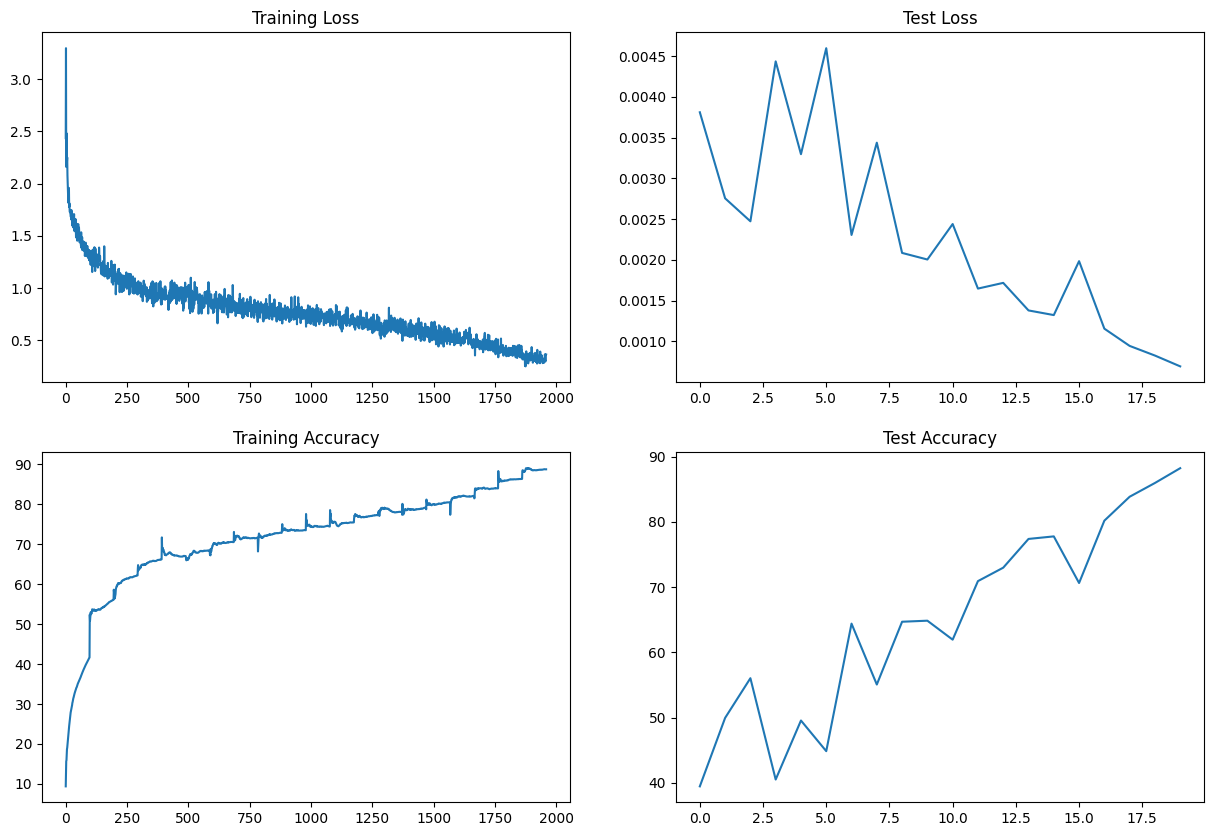

In [22]:
plot_loss_accuracy()

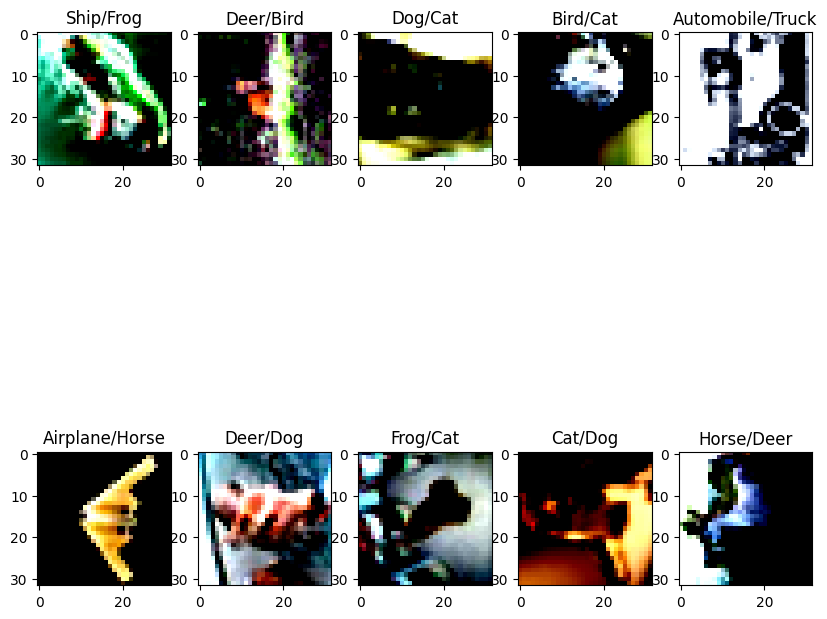

In [93]:
img, trs, prs = get_misclassified(model, device, test_loader, n = 10)
show_misclassified(img, trs, prs)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
/usr/local/lib/python3.10/dist-packages/torch/nn/functional.py:3737: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


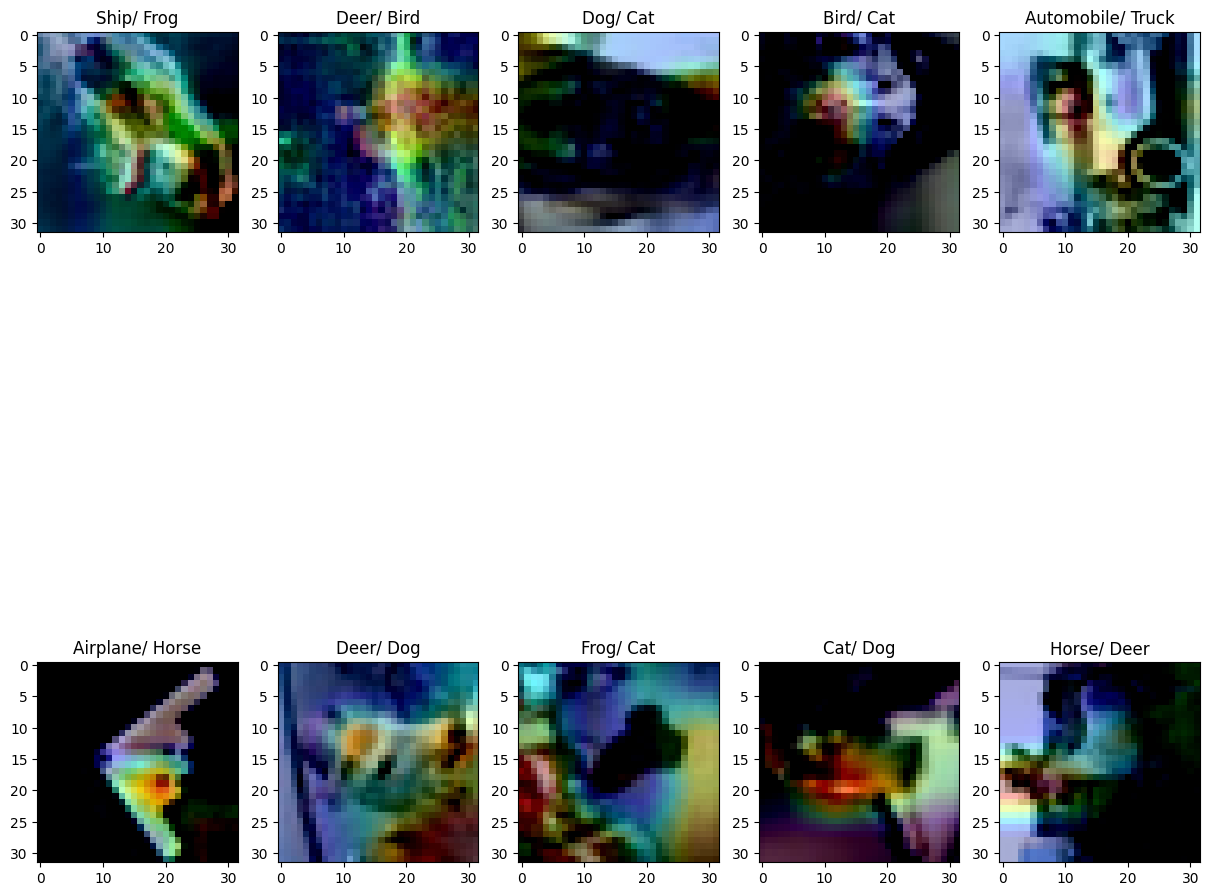

In [89]:
show_gradcam_results(img, trs, prs)